In [ ]:
pip install tensorflow


In [ ]:
pip install opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes (oily, normal, dry, combination)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'faces',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse')  # Adjust batch size and target size as needed

validation_generator = test_datagen.flow_from_directory(
    'faces',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse')  # Adjust batch size and target size as needed



Found 74 images belonging to 4 classes.
Found 74 images belonging to 4 classes.


In [27]:
model.fit(train_generator, epochs=50, validation_data=validation_generator)


NameError: name 'model' is not defined

In [2]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')


NameError: name 'model' is not defined

1/1 [==============================] - 0s 35ms/step


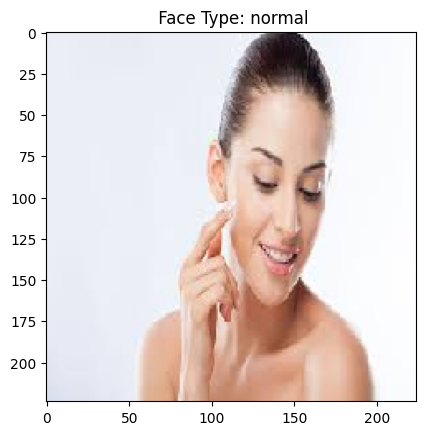

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model

# Load and preprocess a new image
img_path = 'images (1).jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Make predictions
predictions = model.predict(img_array)
face_type = np.argmax(predictions)

# Map numerical predictions to face types
face_types = {0: 'combination', 1: 'dry', 2: 'normal', 3: 'oily'}
predicted_face_type = face_types[face_type]

# Display the input image with the predicted face type
plt.imshow(img)
plt.title(f' Face Type: {predicted_face_type}')
plt.show()


1/1 [==============================] - 0s 52ms/step


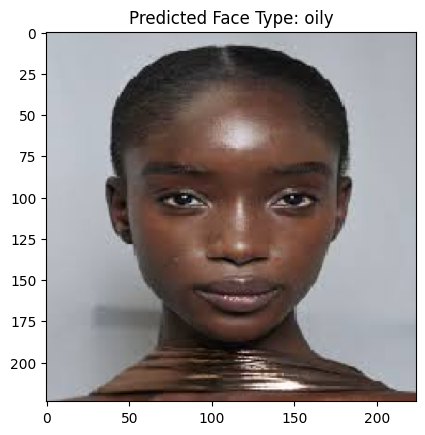

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model

# Load and preprocess a new image
img_path = 'imagesvc.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Make predictions
predictions = model.predict(img_array)
face_type = np.argmax(predictions)

# Map numerical predictions to face types
face_types = {0: 'combination', 1: 'dry', 2: 'normal', 3: 'oily'}
predicted_face_type = face_types[face_type]

# Display the input image with the predicted face type
plt.imshow(img)
plt.title(f'Predicted Face Type: {predicted_face_type}')
plt.show()


In [14]:
tf.keras.models.save_model(model, 'model=tel-face-oily')

AttributeError: 'ellipsis' object has no attribute 'outputs'